<a href="https://colab.research.google.com/github/anurag965/ML-Content/blob/main/vectorized_backpropagation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# **LOAD & VISUALIZE DATA**

In [28]:
file_path = '/content/sample_data/california_housing_test.csv'

In [29]:
df=pd.read_csv(file_path)

In [30]:
print(df)

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  households  median_income  median_house_value

In [31]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])
print("Number of input features: ",df.shape[1] - 1)

Number of rows:  3000
Number of columns:  9
Number of input features:  8


In [32]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


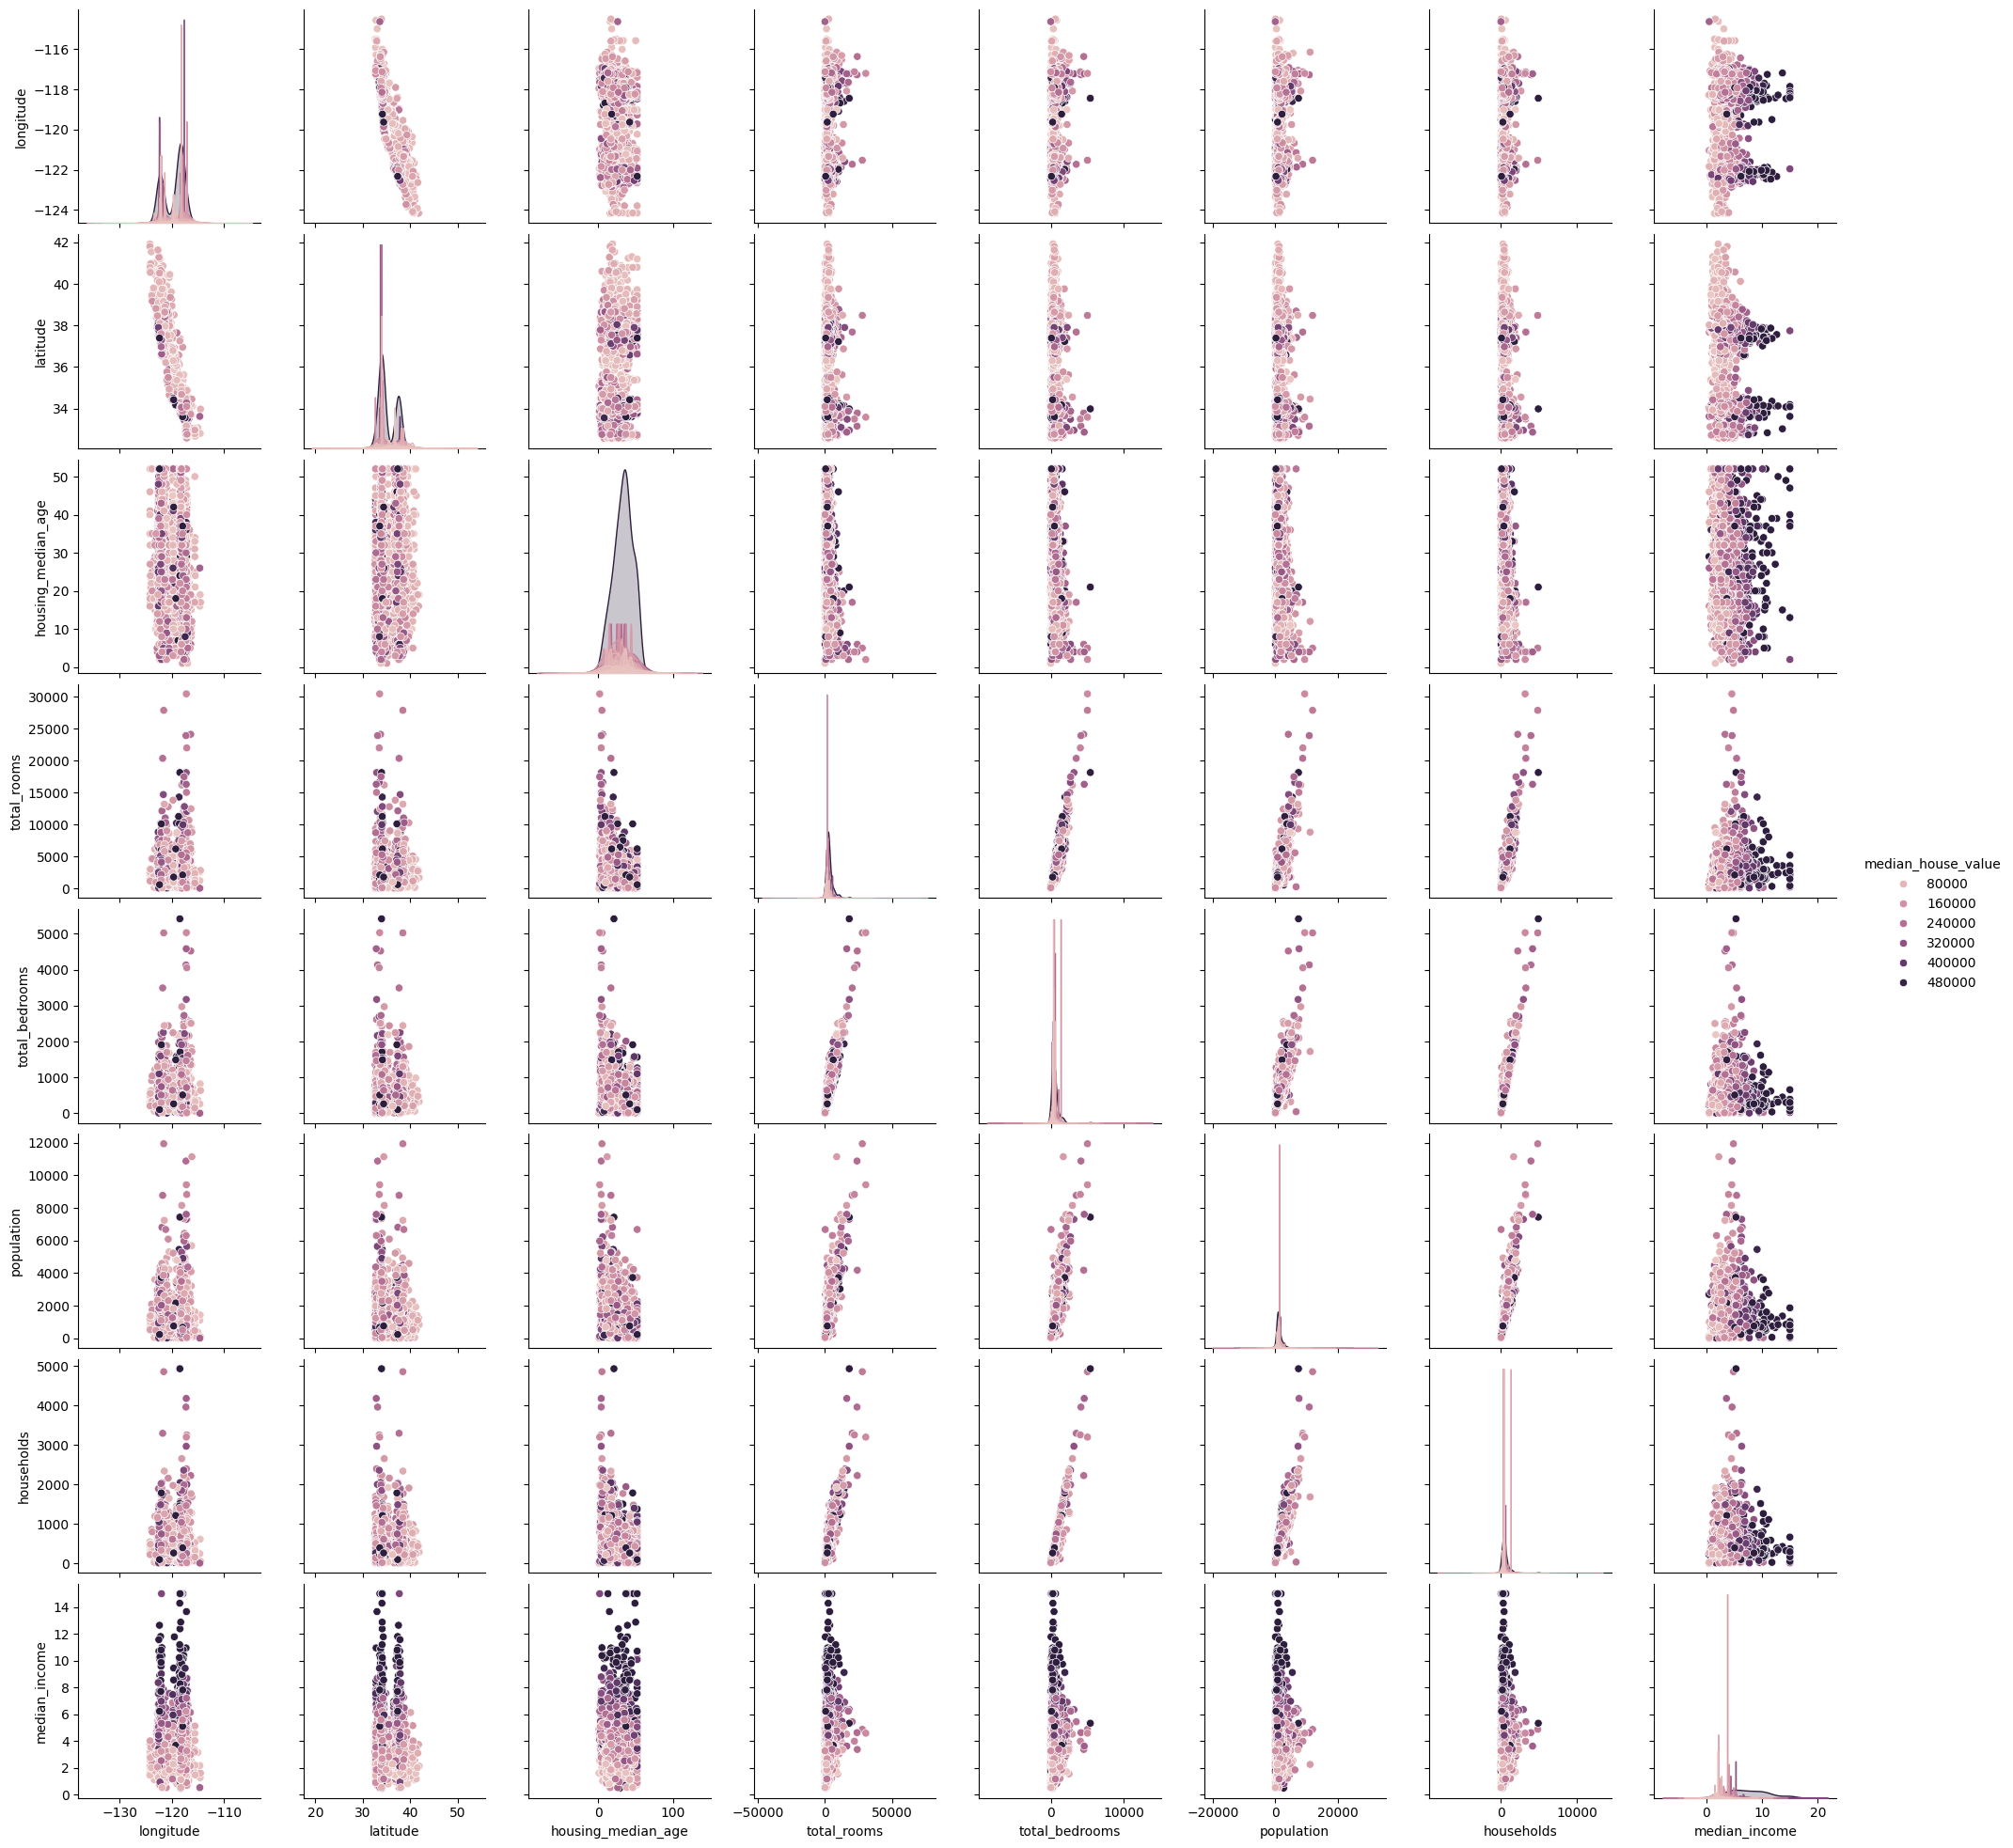

In [33]:
sns.pairplot(df, hue='median_house_value')
plt.show()

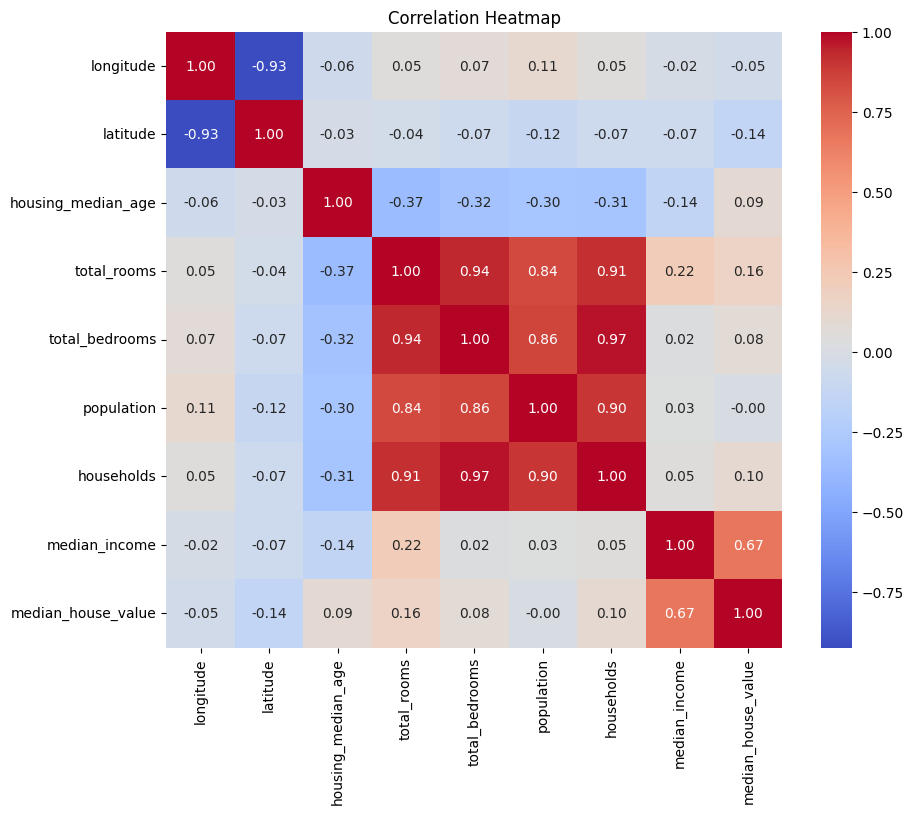

In [34]:
correlation_matrix = df.corr() # correlation matrix
plt.figure(figsize=(10, 8))
# heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

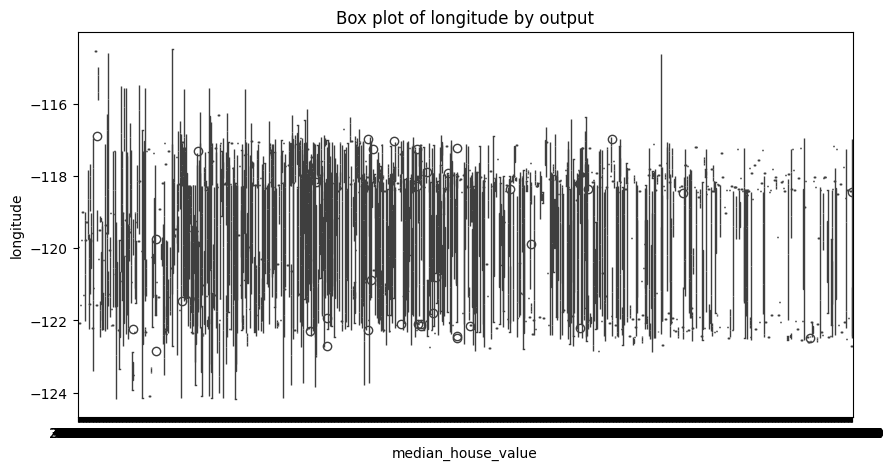

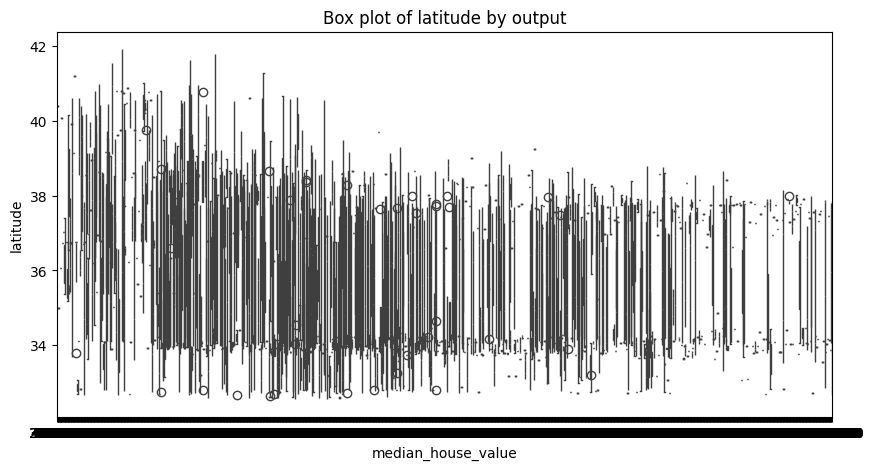

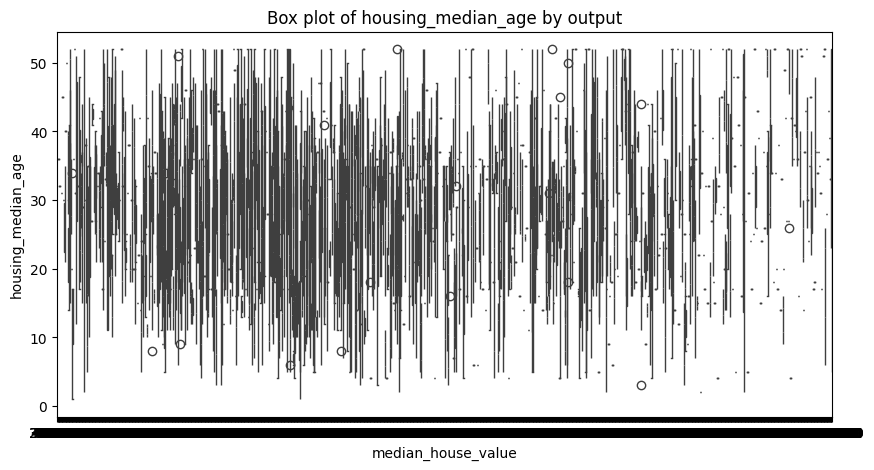

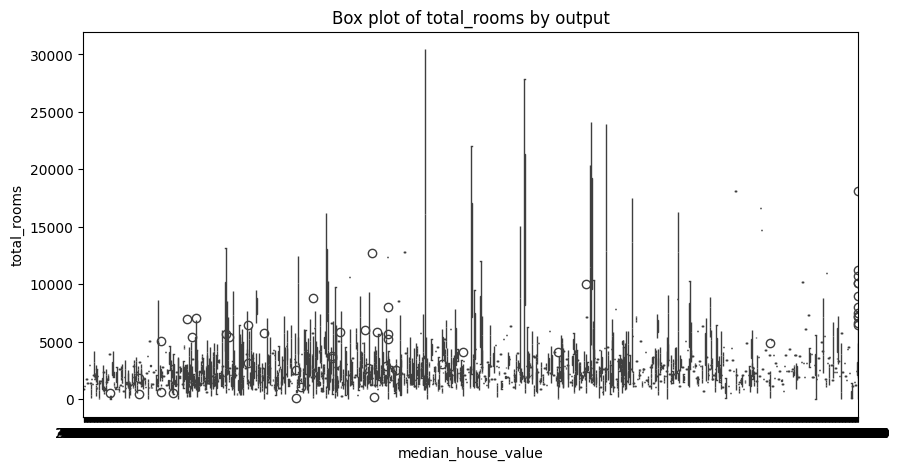

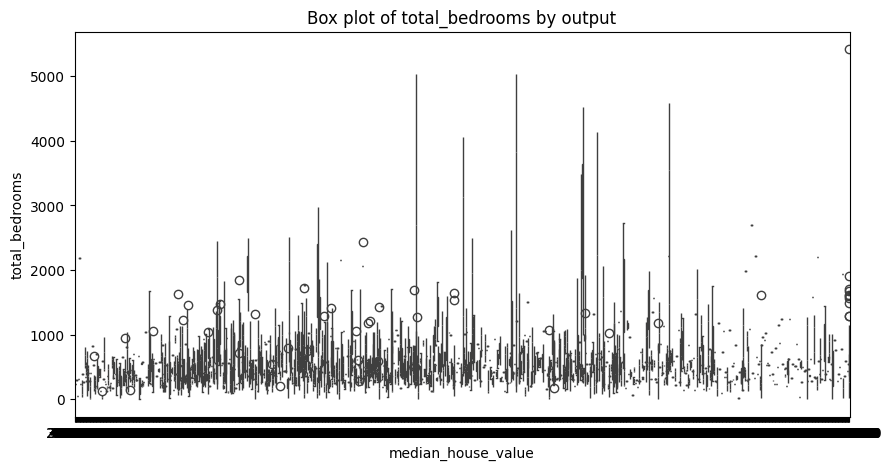

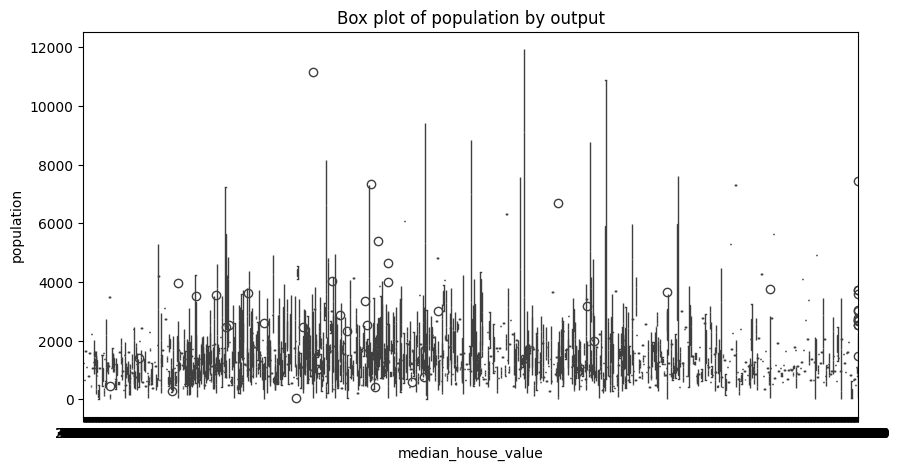

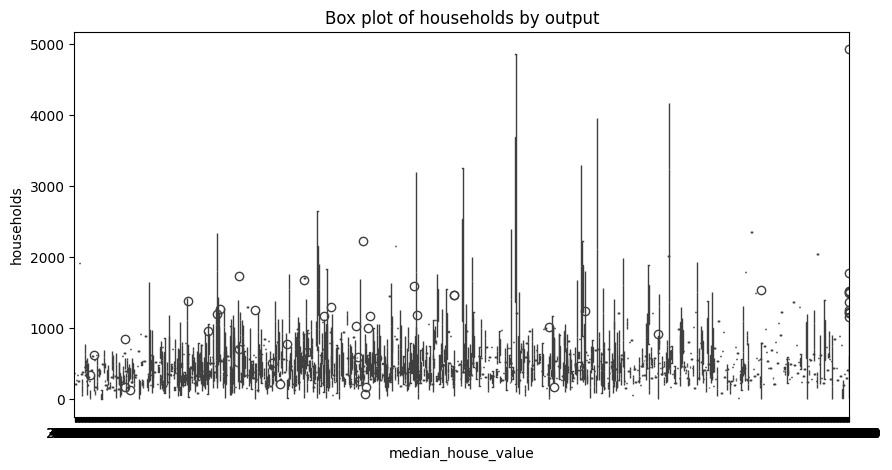

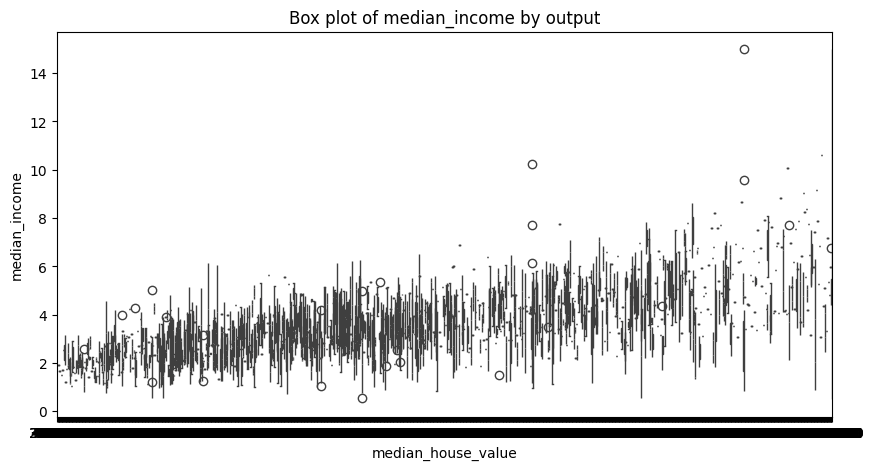

In [35]:
# box plots for each input feature
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='median_house_value', y=column, data=df)
    plt.title(f'Box plot of {column} by output')
    plt.show()

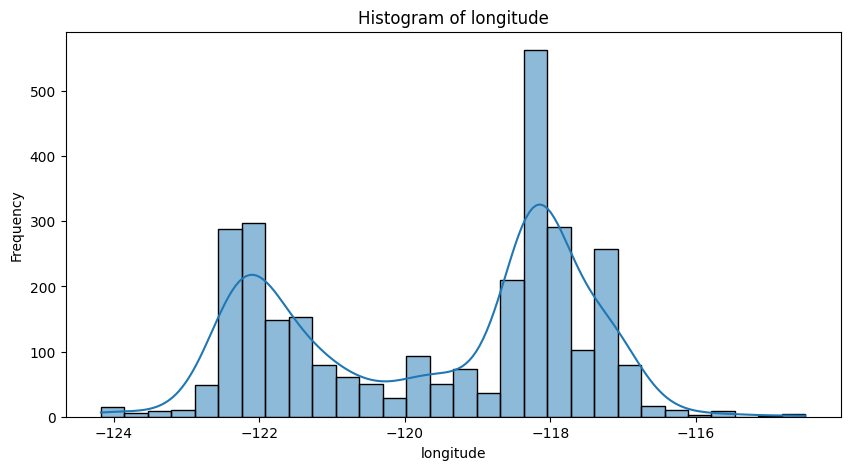

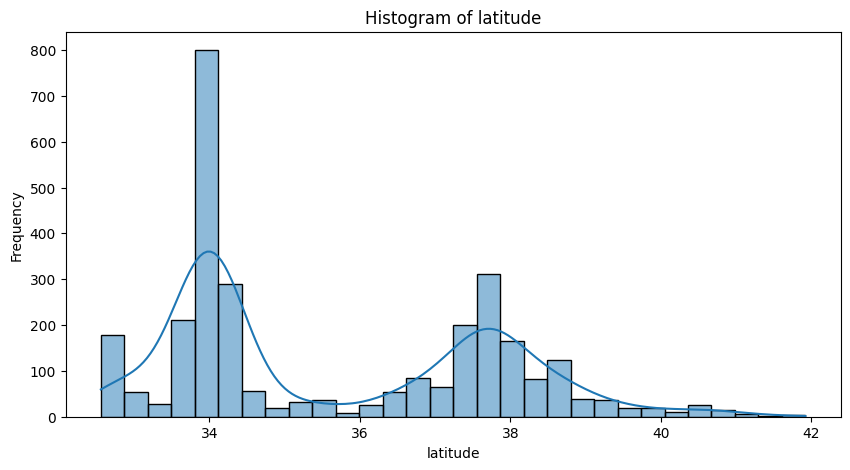

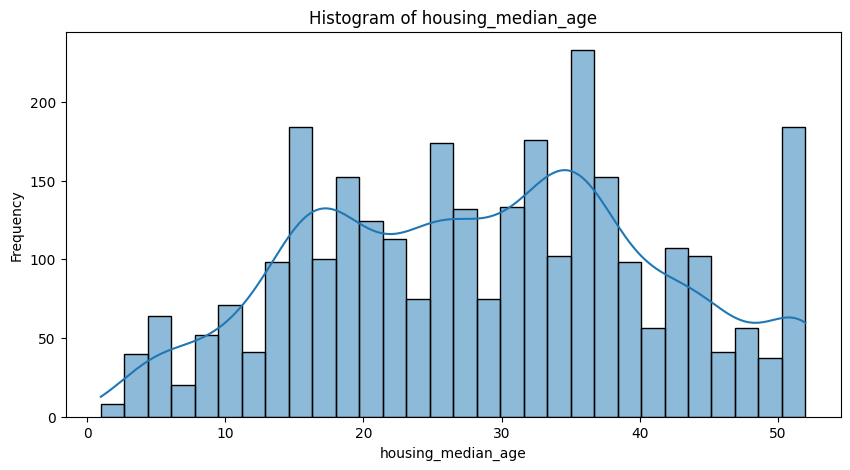

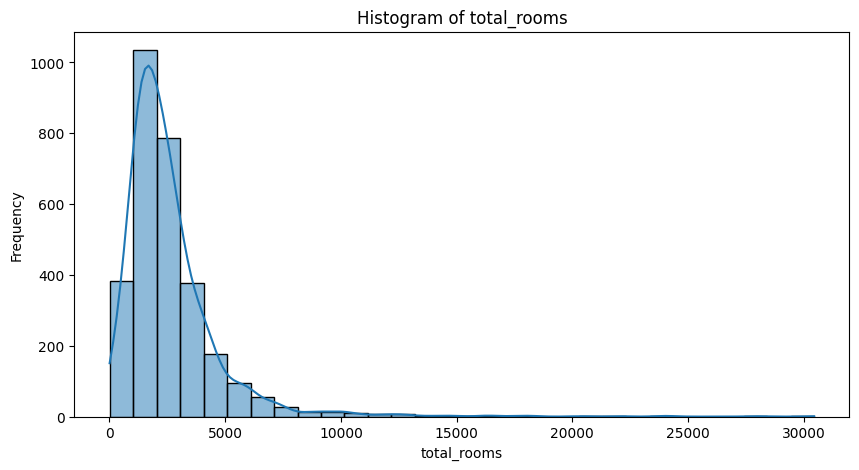

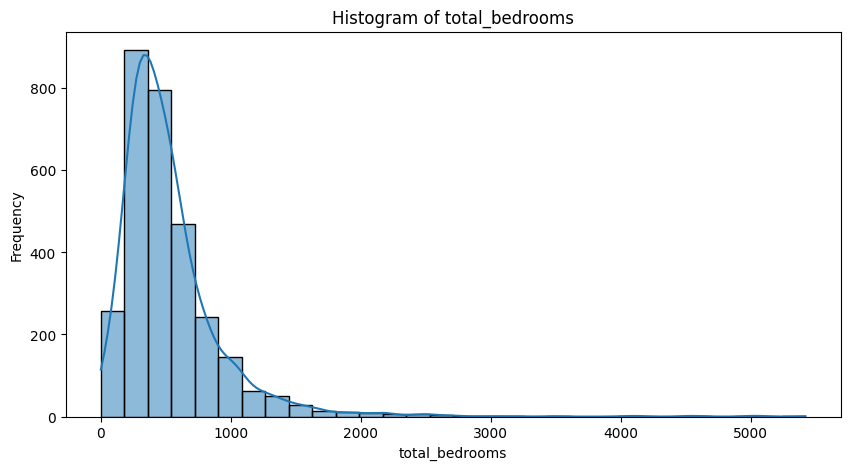

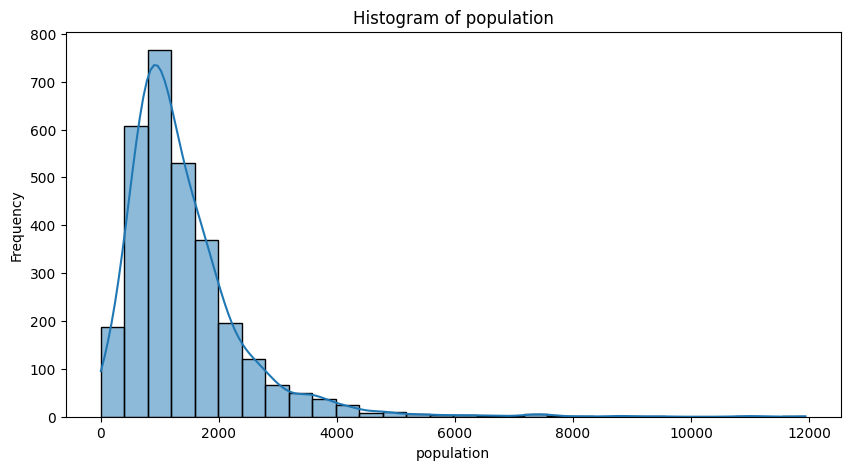

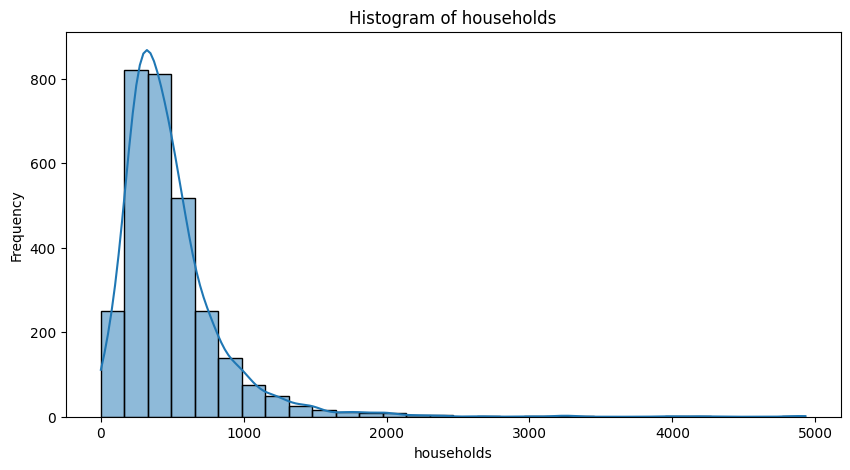

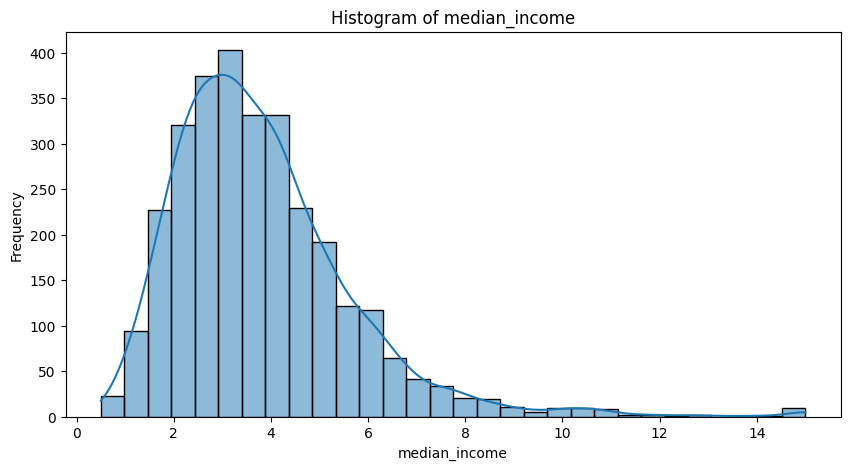

In [36]:
# histograms
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

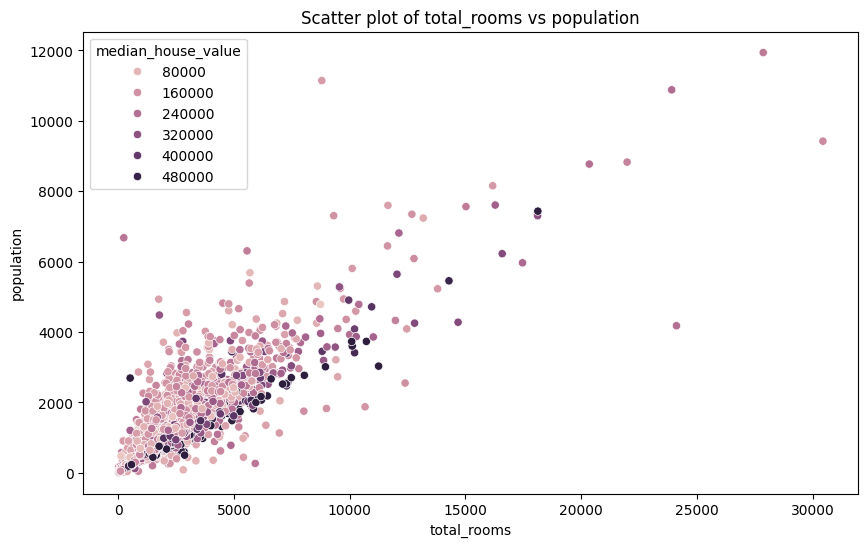

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_rooms', y='population', hue='median_house_value')
plt.title('Scatter plot of total_rooms vs population')
plt.show()

# **NEURAL NETWORK CLASS**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

class FF_NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.n_layers = len(layer_sizes)

        self.W = {}
        self.B = {}
        for i in range(1, self.n_layers):
            self.W[i] = np.random.randn(layer_sizes[i-1], layer_sizes[i]) * np.sqrt(2.0/layer_sizes[i-1])
            self.B[i] = np.zeros((1, layer_sizes[i]))

    def softmax(self, X):
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_X / np.sum(exp_X, axis=1, keepdims=True)

    def softmax_derivative(self, X):
        return X * (1 - X)

    def forward_pass(self, X):
        self.A = {}
        self.H = {}
        self.H[0] = X

        for i in range(1, self.n_layers):
            self.A[i] = np.matmul(self.H[i-1], self.W[i]) + self.B[i]
            if i == self.n_layers - 1:  # Softmax activation for output layer
                self.H[i] = self.softmax(self.A[i])
            else:  # ReLU activation for hidden layers
                self.H[i] = np.maximum(0, self.A[i])

        return self.H[self.n_layers - 1]

    def grad(self, X, Y):
        m = X.shape[0]
        self.forward_pass(X)

        self.dW = {}
        self.dB = {}
        self.dA = {}

        # Compute gradient for the output layer (Cross-entropy loss)
        self.dA[self.n_layers - 1] = (self.H[self.n_layers - 1] - Y) / m

        for i in range(self.n_layers - 1, 0, -1):
            self.dW[i] = np.matmul(self.H[i-1].T, self.dA[i])
            self.dB[i] = np.sum(self.dA[i], axis=0, keepdims=True)

            if i > 1:  # For hidden layers
                self.dA[i-1] = np.matmul(self.dA[i], self.W[i].T) * (self.H[i-1] > 0)  # ReLU derivative

    def fit(self, X, Y, epochs=1000, learning_rate=0.001, display_loss=False):
        if display_loss:
            losses = []

        for e in tqdm(range(epochs), total=epochs, unit="epoch"):
            self.grad(X, Y)

            for i in range(1, self.n_layers):
                self.W[i] -= learning_rate * self.dW[i]
                self.B[i] -= learning_rate * self.dB[i]

            if display_loss and e % 10 == 0:
                Y_pred = self.predict(X)
                loss = log_loss(Y, Y_pred)
                losses.append(loss)

        if display_loss:
            plt.figure(figsize=(10, 6))
            plt.plot(range(0, epochs, 10), losses)
            plt.xlabel('Epochs')
            plt.ylabel('Cross-Entropy Loss')
            plt.title('Training Loss over Time')
            plt.show()

    def predict(self, X):
        return self.forward_pass(X)


# **DECIDING NUMBER OF NEURONS IN VARIOUS LAYERS**

In [68]:
def load_data_from_csv(file_path):
    df = pd.read_csv(file_path)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    # Scale the features
    X_scaler = StandardScaler()
    X_scaled = X_scaler.fit_transform(X)
    # Convert target to categorical classes
    bins = np.linspace(np.min(y), np.max(y), num=4)  # 3 bins (4 edges)
    y_binned = np.digitize(y, bins) - 1  # labels starting from 0

    encoder = OneHotEncoder(sparse_output=False)
    y_one_hot = encoder.fit_transform(y_binned.reshape(-1, 1))
    return X_scaled, y_one_hot, encoder

In [69]:
X, y, encoder = load_data_from_csv(file_path)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
input_size = 8
hidden_layers = [128 , 64, 32]
output_size = y.shape[1]

In [72]:
layer_sizes = [input_size] + hidden_layers + [output_size]

# **TRAINING MODEL**

  0%|          | 0/10000 [00:00<?, ?epoch/s]

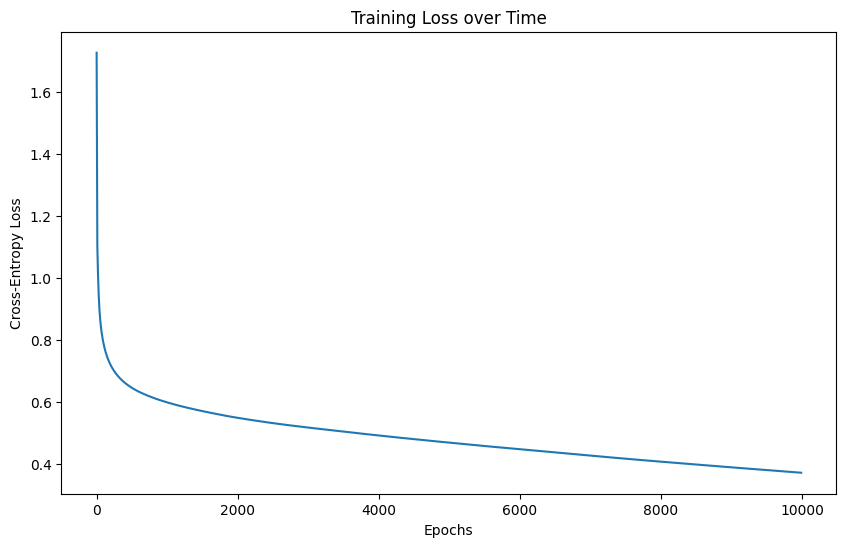

In [78]:
model = FF_NeuralNetwork(layer_sizes)
model.fit(X_train, y_train, epochs=10000, learning_rate=0.01, display_loss=True)

# **PREDICTING**

In [79]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [80]:
train_loss = log_loss(y_train, y_train_pred)
test_loss = log_loss(y_test, y_test_pred)

In [81]:
train_auc = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
test_auc = roc_auc_score(y_test, y_test_pred, multi_class='ovr')

In [82]:
print("\nModel Performance:")
print(f"Training Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Training AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Model Performance:
Training Loss: 0.3722
Test Loss: 0.6160
Training AUC: 0.9650
Test AUC: 0.9056
